# <center> Unsupervised Learning Methods </center>
## <center> Problem Set 1 </center>
### <center> Optimization and Clustering </center>

## 1.1 Convexity ##


1.1.1

Lets prove that $$R_{\geq0}^d$$ is convex

let $$0 \leq t \leq 1$$ and $$x,y \in R_{\geq0}^d$$
then for any $$ 0 \leq i \leq d$$ if  $$z = x + y$$

$$z_i = x_i + y_i \geq x_i \geq 0$$ so $$z \in  R_{\geq0}^d$$
so $$R_{\geq0}^d$$ is convex, as required

1.1.2

lets prove by induction for any For $$N \geq 2$$
base: $$N = 2$$
Then it derived by the definition of convexity. 
Lets assume correctnes for any $$N \in \mathbb{N}$$
and prove for $$N + 1$$
let $${x_i \in C}_{i=1}^{N+1}$$
and $$\sum_{i=1}^{N+1}\alpha_i = 1$$
Lets looks at $$\sum_{i=1}^{N+1}\alpha_i \cdot x_i = \sum_{i=1}^{N-1}\alpha_i \cdot x_i + (\alpha_n + \alpha_{n+1}) \cdot x_n - \alpha_{n+1} \cdot x_n + \alpha_{n+1}x_{n+1}$$

from the induction assumption we have in hand that 

1.1.3

Lets prove 
lets choose $\alpha_1 = \alpha_2 = ... = \alpha_9 = 9$ and $\alpha_10 = 1$ and some ${x_i}_{i=1}^9$ and $x_{10} = y$ then the convex combination $\sum_{i=1}^10\alpha_i\cdot x_i = y$ as required

## 1.2 The gradient ##


1.2.1



In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib
import timeit
from scipy.spatial.distance import cdist


matplotlib.rc('font', **{'size' : 16})

 # 1. Optimization

## 1.3 Descent Methods

### Gradient descent
* Let $\boldsymbol{Y}\in\mathbb{R}^{d\times d}$ be a blurred version
of the image $\boldsymbol{X}\in\mathbb{R}^{d\times d}$:
$$\boldsymbol{Y}=\boldsymbol{H}\boldsymbol{X}\boldsymbol{H}^{T}$$
where $\boldsymbol{H}\in\mathbb{R}^{d\times d}$ is a known (separable)
blurring matrix.

#### Load the data ($\boldsymbol{Y}$ and $\boldsymbol{H}$):

In [2]:
from scipy.io import loadmat

data = loadmat('data.mat')
Y    = data['Y']
H    = data['H']

Y.shape, H.shape

((256, 256), (256, 256))

#### Plot $Y$ and $H$:

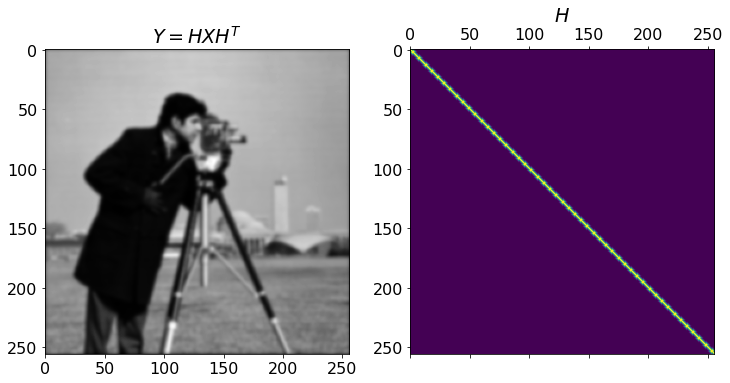

In [3]:
_, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(Y, cmap='gray')
ax[1].matshow(H)
ax[0].set_title('$Y = H X H^T$')
ax[1].set_title('$H$')
plt.show()


* Our goal is to find $\boldsymbol{X}$ that minimizes:
$$\boldsymbol{X}^{\star}=\arg\min_{\boldsymbol{X}}f\left(\boldsymbol{X}\right)=\arg\min_{\boldsymbol{X}}\left\Vert \boldsymbol{Y}-\boldsymbol{H}\boldsymbol{X}\boldsymbol{H}^{T}\right\Vert _{F}^{2}$$

### 1.3.1
1. Find a closed form expression for $\boldsymbol{X}^{\star}$ as a function of $\boldsymbol{Y}$ and $\boldsymbol{H}$.
2. Compute $\boldsymbol{X}^{\star}$ and plot it.

since we are trying to minimize a convex function $$\left\Vert \boldsymbol{Y}-\boldsymbol{H}\boldsymbol{X}\boldsymbol{H}^{T}\right\Vert _{F}^{2}$$ 
Then we can diffrentiate it and find the stationary point 

Lets define 
$$f = ||Y - HXH^T||^2_F$$
then $\frac{df}{dx} = -2HH(Y - HXH^T)$

current loss 5.766231, itr: 0

final loss: 0.029981, time: -0.006413


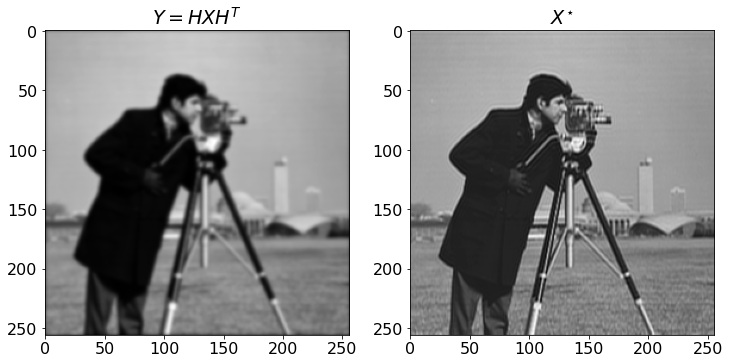

In [127]:
'''
Your code here...
'''

def compute_gradient(Xstar):
    return -2 * H.dot(H.T).dot(Y - H.dot(Xstar).dot(H.T))

Xstar  = Y
alpha = 0.99
iterations = 100000
current_loss  = np.linalg.norm(Y - H.dot(Xstar).dot(H.T))
start = timeit.timeit()

for itr in range(iterations):    
    if itr % 1000 == 0:
        print('current loss %f, itr: %d' % (current_loss, itr))    
    current_loss  = np.linalg.norm(Y - H.dot(Xstar).dot(H.T)) ** 2
    Xstar = Xstar - alpha * compute_gradient(Xstar)
    if current_loss < 0.03:
        break

end = timeit.timeit()
print()
_, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(Y,     cmap='gray')
ax[1].imshow(Xstar, cmap='gray')
ax[0].set_title('$Y = H X H^T$')
ax[1].set_title('$X^{\star}$')
print('final loss: %f, time: %f' % (current_loss, (end - start)))
plt.show()

------------------------------------------------------------------------------------------------------
* To avoid matrix inversion, we will find $\boldsymbol{X}^{\star}$ using gradient descent.
### 1.3.2
1. Implement the following functions where
$$f\left(\boldsymbol{X}\right)=\left\Vert \boldsymbol{Y}-\boldsymbol{H}\boldsymbol{X}\boldsymbol{H}^{T}\right\Vert _{F}^{2}$$

```python
#==================================================#
def f(X):
    '''
    f(X) = ||Y - HXH^T||_F^2 is the objective function
    '''
    return np.linalg.norm(Y - H.dot(Xstar).dot(H.T)) ** 2
#==================================================#
#==================================================#
def Df(X):
    '''
    Df(X) = ∇f(X) is the objective gradient
    '''
    return -2 * H.dot(H.T).dot(Y - H.dot(Xstar).dot(H.T))
#==================================================#
#==================================================#
def ApplyGradientDescent(f, Df, X0, lr, ε):
    '''
    Apply gradient descent.
    Args:
        f  - Objective function
        Df - Objective gradient
        X0 - Initial point
        lr - Learning rate (step size)
        ε  - Stopping criterion value
    Output:
        X  - The converged X
    Stopping criterion:
        Stop iterate when f(X) < ε
    '''
    pass
#==================================================#
```

2. Set a reasonable starting point $\boldsymbol{X}^{\left(0\right)}$.
3. Find $\boldsymbol{X}$ such that $f\left(\boldsymbol{X}\right)<\epsilon$ where $\epsilon=10^{-4}$.
    * Time your function.
    * Plot the final obtained $\boldsymbol{X}$. 

In [133]:
import time

#==================================================#
def f(X):
    '''
    f(X) = ||Y - HXH^T||_F^2 is the objective function
    '''
    return np.linalg.norm(Y - H.dot(X).dot(H.T)) ** 2
#==================================================#
#==================================================#
def Df(X):
    '''
    Df(X) = ∇f(X) is the objective gradient
    '''
    return -2 * H.T.dot(Y - H.dot(X).dot(H.T)).dot(H)
#==================================================#
#==================================================#
def ApplyGradientDescent(f, Df, X0, lr, epsilon):
    '''
    Apply gradient descent.
    Args:
        f  - Objective function
        Df - Objective gradient
        X0 - Initial point
        lr - Learning rate (step size)
        ε  - Stopping criterion value
    Output:
        X  - The converged X
    Stopping criterion:
        Stop iterate when f(X) < ε
    '''
    current_x = X0
    iterations = 500000
    for itr in range(iterations):    
        if itr % 1000 == 0:
            print('current loss %f, itr: %d, x[0][0]: %f' % (f(current_x), itr, current_x[0][0]))
        current_x = current_x - lr * Df(current_x)
        if f(current_x) < epsilon:
            print('converged!!')
            return current_x
    print('did not converged')
    return current_x

X0 = Y
epsilon = 0.0001
lr = 0.9
start = time.time()

Xstar = ApplyGradientDescent(f, Df, X0, lr, epsilon)

end = time.time()
_, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(Y,     cmap='gray')
ax[1].imshow(Xstar, cmap='gray')
ax[0].set_title('$Y = H X H^T$')
ax[1].set_title('$X^{\star}$')
print('final loss: %f, time: %f' % (f(Xstar), (end - start)))
plt.show()

current loss 33.249416, itr: 0, x[0][0]: 0.253516
df time: 0.002992
df time: 0.006976
df time: 0.002996
df time: 0.002345
df time: 0.002047
df time: 0.004986
df time: 0.003993
df time: 0.005251
df time: 0.001995
df time: 0.002993
df time: 0.002990
df time: 0.002994
df time: 0.001994
df time: 0.002974
df time: 0.004988
df time: 0.005512
df time: 0.004091
df time: 0.006078
df time: 0.005546
df time: 0.003989
df time: 0.007028
df time: 0.002994
df time: 0.002934
df time: 0.005989
df time: 0.007978
df time: 0.003968
df time: 0.002986
df time: 0.003924
df time: 0.002978
df time: 0.004947
df time: 0.002516
df time: 0.002992
df time: 0.002046
df time: 0.005688
df time: 0.002952
df time: 0.003988
df time: 0.004947
df time: 0.010310
df time: 0.005970
df time: 0.003987
df time: 0.003037
df time: 0.002991
df time: 0.001995
df time: 0.003015
df time: 0.001993
df time: 0.002902
df time: 0.003156
df time: 0.003002
df time: 0.003579
df time: 0.003006
df time: 0.001998
df time: 0.004270
df time: 0.002

df time: 0.002983
df time: 0.003741
df time: 0.002969
df time: 0.002992
df time: 0.002991
df time: 0.001993
df time: 0.002993
df time: 0.004747
df time: 0.014963
df time: 0.007035
df time: 0.003007
df time: 0.001995
df time: 0.002986
df time: 0.001995
df time: 0.002068
df time: 0.002993
df time: 0.002990
df time: 0.003010
df time: 0.005747
df time: 0.001995
df time: 0.002991
df time: 0.001995
df time: 0.005106
df time: 0.002991
df time: 0.002140
df time: 0.002993
df time: 0.001996
df time: 0.002563
df time: 0.002951
df time: 0.006971
df time: 0.003056
df time: 0.003115
df time: 0.002992
df time: 0.003994
df time: 0.002998
df time: 0.004972
df time: 0.006984
df time: 0.003988
df time: 0.006098
df time: 0.004987
df time: 0.003994
df time: 0.002991
df time: 0.002991
df time: 0.002992
df time: 0.002771
df time: 0.002074
df time: 0.003236
df time: 0.006903
df time: 0.003987
df time: 0.002934
df time: 0.002993
df time: 0.002990
df time: 0.005984
df time: 0.001994
df time: 0.002991
df time: 0

df time: 0.002991
df time: 0.001992
df time: 0.002991
df time: 0.002993
df time: 0.005985
df time: 0.001989
df time: 0.003994
df time: 0.004986
df time: 0.002993
df time: 0.002986
df time: 0.007092
df time: 0.004082
df time: 0.005927
df time: 0.003992
df time: 0.003993
df time: 0.002392
df time: 0.001996
df time: 0.001969
df time: 0.003996
df time: 0.005984
df time: 0.005992
df time: 0.005066
df time: 0.005981
df time: 0.008297
df time: 0.015918
df time: 0.003920
df time: 0.008399
df time: 0.003194
df time: 0.002996
df time: 0.006980
df time: 0.004021
df time: 0.007431
df time: 0.002611
df time: 0.012522
df time: 0.012465
df time: 0.010253
df time: 0.004992
df time: 0.005973
df time: 0.007128
df time: 0.014810
df time: 0.003984
df time: 0.008004
df time: 0.004998
df time: 0.004985
df time: 0.013302
df time: 0.003003
df time: 0.004978
df time: 0.004147
df time: 0.012015
df time: 0.005779
df time: 0.013873
df time: 0.012914
df time: 0.002006
df time: 0.001995
df time: 0.008976
df time: 0

df time: 0.003931
df time: 0.001992
df time: 0.003917
df time: 0.005998
df time: 0.003985
df time: 0.001994
df time: 0.002888
df time: 0.008076
df time: 0.008853
df time: 0.004031
df time: 0.004781
df time: 0.004083
df time: 0.002987
df time: 0.003052
df time: 0.002023
df time: 0.002916
df time: 0.001870
df time: 0.001994
df time: 0.003235
df time: 0.002991
df time: 0.002993
df time: 0.002940
df time: 0.001994
df time: 0.002993
df time: 0.002362
df time: 0.001996
df time: 0.001994
df time: 0.001436
df time: 0.001995
df time: 0.001994
df time: 0.001995
df time: 0.002992
df time: 0.001994
df time: 0.001994
df time: 0.002898
df time: 0.001994
df time: 0.001994
df time: 0.001994
df time: 0.001995
df time: 0.002061
df time: 0.003901
df time: 0.001993
df time: 0.001994
df time: 0.001688
df time: 0.001994
df time: 0.002079
df time: 0.001990
df time: 0.002043
df time: 0.003051
df time: 0.002992
df time: 0.001740
df time: 0.001994
df time: 0.003014
df time: 0.001951
df time: 0.001994
df time: 0

KeyboardInterrupt: 

------------------------------------------------------------------------------------------------------
### Momentum
* <ins>Momentum</ins> is an effective method to improve convergence rate.
* Gradient descent update rule:
$$\boldsymbol{x}^{\left(t\right)}=\boldsymbol{x}^{\left(t-1\right)}-\mu\nabla f\left(\boldsymbol{x}^{\left(t-1\right)}\right)$$
* Momentum update rule:
$$\boldsymbol{x}^{\left(t\right)}=\boldsymbol{x}^{\left(t-1\right)}-\mu\nabla f\left(\boldsymbol{x}^{\left(t-1\right)}\right)+\beta\left(\boldsymbol{x}^{\left(t-1\right)}-\boldsymbol{x}^{\left(t-2\right)}\right)$$
where $\beta\in[0,1)$ and typically $0.9\leq\beta\leq0.99$.

### 1.3.3
Show that $\boldsymbol{x}^{\left(t\right)}$ can be expressed by:
$$\boldsymbol{x}^{\left(t+1\right)}=\boldsymbol{x}^{\left(t\right)}-\mu\sum_{s=0}^{t}\beta^{t-s}\nabla f\left(\boldsymbol{x}^{\left(s\right)}\right)$$

------------------------------------------------------------------------------------------------------
### 1.3.4
1. Implement the following function:

```python
def ApplyGradientDescentMomentum(f, Df, X0, lr, β, ε):
    '''
    Apply gradient descent with momentum.
    Args:
        f  - Objective function
        Df - Objective gradient
        X0 - Initial point
        lr - Learning rate (step size)
        β  - Momentum decaying factor
        ε  - Stopping criterion value
    Output:
        X  - The converged X
    Stopping criterion:
        Stop iterate when f(X) < ε
    '''
    pass
```

2. Set (the same) reasonable starting point $\boldsymbol{X}^{\left(0\right)}$.
3. Find $\boldsymbol{X}$ such that $f\left(\boldsymbol{X}\right)<\epsilon$ where $\epsilon=10^{-4}$.
    * Time your function.
    * Plot the final obtained $\boldsymbol{X}$. 
    * Compare the run-time performance with and without momentum.  
      (play with the hyper-parameters).
        * **2% Bonus:**  
            Plot the objective value $f(\boldsymbol{X})$ as a function of the iterations.  
            You may need to slightly modify your code.

current loss 33.249416, itr: 0, x[0][0]: 0.253516
current loss 0.000871, itr: 1000, x[0][0]: 0.611226
converged!!
final loss: 0.000098, time: 6.332136


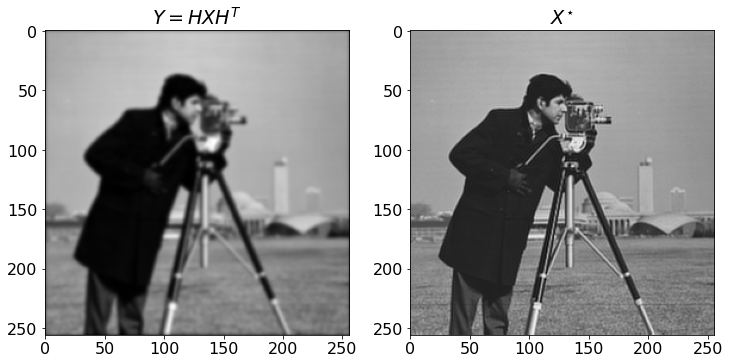

In [131]:
def ApplyGradientDescentMomentum(f, Df, X0, lr, beta, epsilon):
    '''
    Apply gradient descent with momentum.
    Args:
        f  - Objective function
        Df - Objective gradient
        X0 - Initial point
        lr - Learning rate (step size)
        β  - Momentum decaying factor
        ε  - Stopping criterion value
    Output:
        X  - The converged X
    Stopping criterion:
        Stop iterate when f(X) < ε
    '''
    current_x = x_1 = x_2 = X0
    
    iterations = 500000
    for itr in range(iterations):    
        if itr % 1000 == 0:
            print('current loss %f, itr: %d, x[0][0]: %f' % (f(current_x), itr, current_x[0][0]))
        x_2 = x_1
        x_1 = current_x
        current_x = current_x - lr * Df(current_x) + beta * (x_1 - x_2)
        if f(current_x) < epsilon:
            print('converged!!')
            return current_x
    print('did not converge')    
    return current_x


X0 = Y
epsilon = 0.0001
lr = 0.6
start = time.time()
beta = 0.99

Xstar = ApplyGradientDescentMomentum(f, Df, X0, lr, beta, epsilon)

end = time.time()
_, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(Y,     cmap='gray')
ax[1].imshow(Xstar, cmap='gray')
ax[0].set_title('$Y = H X H^T$')
ax[1].set_title('$X^{\star}$')
print('final loss: %f, time: %f' % (f(Xstar), (end - start)))
plt.show()

------------------------------------------------------------------------------------------------------
# 2. Clustering
## 2.1 K-Means
### 2.1.3
Implement the K-Means algorithm.
```python
def KMeans(mX, K):
    '''
    Apply K-Means
    Args:
        mX   - Input data,         mX.shape = d, N
        K    - Number of clusters, positive integer
    Output:
        vIdx - Index of the cluster each point belongs to, vIdx.shape = N
        mMu  - Clusters' centers,                          mMu.shape  = d, K
        
    '''
    pass
```
**Notes**:
* The algorithm halts when no update occur.  
* **4% Bonus**: Implement the K-Menas++ initialization: https://en.wikipedia.org/wiki/K-means%2B%2B
------------------------------------------------------------------------------------------------------

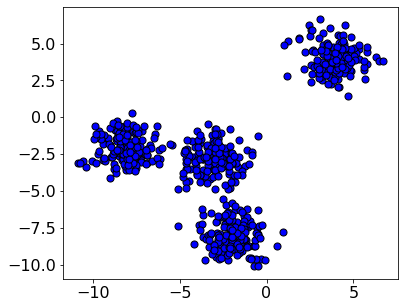

In [433]:
mMu = np.array([[4,   4],
                [-3, -3],
                [-2, -8],
                [-8, -2]])
Ni = 150
mX = np.row_stack([np.random.randn(Ni, 2) + vMu for vMu in mMu])
N  = mX.shape[0]

plt.figure(figsize=(6,5))
plt.scatter(mX[:,0], mX[:,1], s=50, c='b', edgecolor='k')
plt.axis('equal')
plt.axis('tight')
plt.show()

In [490]:
def KMeans(mX, K):
    '''
    Apply K-Means
    Args:
        mX   - Input data,         mX.shape = d, N
        K    - Number of clusters, positive integer
    Output:
        vIdx - Index of the cluster each point belongs to, vIdx.shape = N
        mMu  - Clusters' centers,                          mMu.shape  = d, K

    '''
    mMu0 = mX[np.random.choice(np.arange(mX.shape[0]), K),:] #-- initial means
    lMu     = [mMu0]
    numIter = 500
    mMui    = mMu0 * np.nan
    previous_vIdx = None
    for ii in range(numIter):
        halt_flag = False

        #-- Step 1, assign clusters:
#         print('p1: ', mX.shape)
#         print('p2: ', lMu[-1].shape)
        mD   = cdist(mX, lMu[-1])
        vIdx = np.argmin(mD, axis=1)  

        #-- Step 2, compute clusters means
        
        for kk in range(K):
            mMui[kk,:] = np.mean(mX[vIdx == kk], axis=0)
        
        lMu.append(mMui.copy())
        if (vIdx == previous_vIdx).all() and (lMu[-1] == lMu[-2]).all():
            print('halt after %d iterations' % ii)
            return lMu
        previous_vIdx = vIdx
    print('did not halt')
    return lMu


In [501]:
def KMeans2(mX, K):
    '''
    Apply K-Means
    Args:
        mX   - Input data,         mX.shape = d, N
        K    - Number of clusters, positive integer
    Output:
        vIdx - Index of the cluster each point belongs to, vIdx.shape = N
        mMu  - Clusters' centers,                          mMu.shape  = d, K

    '''
    mMu0 = mX[np.random.choice(np.arange(mX.shape[0]), K),:] #-- initial means
    lMu     = [mMu0]
    numIter = 500
    mMui    = mMu0 * np.nan
    previous_vIdx = None
    for ii in range(numIter):
        halt_flag = False

        #-- Step 1, assign clusters:
        mD_color = cdist(mX[:,:3], lMu[-1][:,:3])
        mD2_spatial = cdist(mX[:,3:], lMu[-1][:,3:])
        
        vIdx = np.argmin(3* mD_color + 5 * mD2_spatial, axis=1)  

        #-- Step 2, compute clusters means
        
        for kk in range(K):
            mMui[kk,:] = np.mean(mX[vIdx == kk], axis=0)
        
        lMu.append(mMui.copy())
        if (vIdx == previous_vIdx).all() and (lMu[-1] == lMu[-2]).all():
            print('halt after %d iterations' % ii)
            return lMu
        previous_vIdx = vIdx
    print('did not halt')
    return lMu #-- in practice, we only need the last one: lMu[-1]

### Super-pixels
1. Load the `Fruits.jpeg` image and covert it to NumPy ndarray `mI`:
$$\boldsymbol{I}\in\mathbb{R}^{\text{height}\times\text{width}\times3}$$
2. Use the LAB color space (instead of RGB) (`mLAB`).
3. Create a new "image" `mX` such that:
$$\boldsymbol{X}\in\mathbb{R}^{\text{height}\times\text{width}\times5}$$
where:
    * The first 3 channels are the LAB image.
    * The 4th channel is the $x$ position.
    * The 5th channel is the $y$ position.
4. Apply K-Means to the pixels of `mX` (set a reasonable $K$).
5. Create a mask image `mMask` such that:
$$\boldsymbol{M}\in\mathbb{R}^{\text{height}\times\text{width}}$$
where each pixel in `mMask` is the cluster index of the corresponding pixel in `mI`.
6. Plot the segmentation (Superpixels) map.

**Tip:** Try different weights for the LAB image and the XY position.

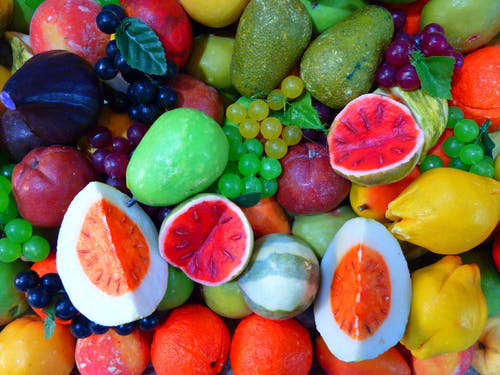

In [4]:
from PIL                  import Image
from skimage              import color
from skimage.segmentation import mark_boundaries

oImage = Image.open('Fruits.jpeg')
oImage

In [268]:
mI   = np.array(oImage)
mLAB = color.rgb2lab(mI)
mLAB_padded = np.full((mLAB.shape[0],mLAB.shape[1], 5), None)
for i in range(mLAB.shape[0]):
    for j in range(mLAB.shape[1]):
        mLAB_padded[i,j,:3] = mLAB[i][j]
        mLAB_padded[i,j,3] = i
        mLAB_padded[i,j,4] = j

halt after 115 iterations
current dist: 8493958.074315


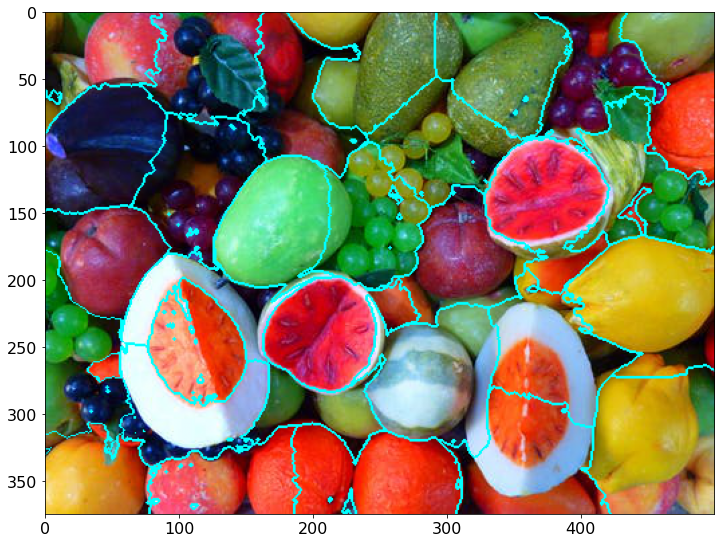

In [318]:
r = KMeans2(mLAB_padded.reshape(mLAB.shape[0] * mLAB.shape[1], 5), 30)
mD = cdist(mLAB_padded.reshape(mLAB.shape[0] * mLAB.shape[1], 5), r[-1])
vIdxMin = np.min(mD, axis=1)
print('current dist: %f' % np.sum(vIdxMin))
vIdx = np.argmin(mD, axis=1)
mMask = vIdx.reshape(mLAB.shape[0],mLAB.shape[1])
mO = mark_boundaries(mI, mMask, color=(0,1,1))
plt.figure(figsize=(12, 12))
plt.imshow(mO)
plt.show()


halt after 58 iterations
current dist other: 8391743.411856


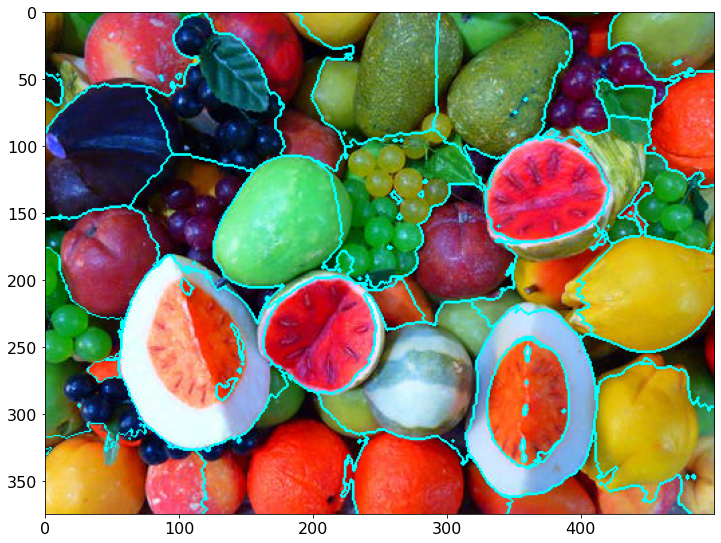

In [315]:
r = KMeans(mLAB_padded.reshape(mLAB.shape[0] * mLAB.shape[1], 5), 30)
mD = cdist(mLAB_padded.reshape(mLAB.shape[0] * mLAB.shape[1], 5), r[-1])
vIdxMin = np.min(mD, axis=1)
print('current dist other: %f' % np.sum(vIdxMin))
vIdx = np.argmin(mD, axis=1)
mMask = vIdx.reshape(mLAB.shape[0],mLAB.shape[1])
mO = mark_boundaries(mI, mMask, color=(0,1,1))
plt.figure(figsize=(12, 12))
plt.imshow(mO)
plt.show()

------------------------------------------------------------------------------------------------------
## 2.2 GMM
The GMM algorithm aims to maximize the (log) likelihood objective:
$$\arg\max_{\left\{ \left(w_{k},\boldsymbol{\mu}_{k},\boldsymbol{\Sigma}_{k}\right)\right\} _{k=1}^{K}}f=\arg\max_{\left\{ \left(w_{k},\boldsymbol{\mu}_{k},\boldsymbol{\Sigma}_{k}\right)\right\} _{k=1}^{K}}\sum_{i=1}^{N}\log\left(\sum_{k=1}^{K}w_{k}\mathcal{N}\left(\boldsymbol{x}_{i};\boldsymbol{\mu}_{k},\boldsymbol{\Sigma}_{k}\right)\right)$$
### 2.2.3
Implement the GMM algorithm.
```python
def GMM(mX, K, ε=1e-6, maxIter=100):
    '''
    Apply GMM
    Args:
        mX      - Input data,                   mX.shape = d, N
        K       - Number of clusters,           positive integer
        ε       - Stopping criterion threshold, positive real
        maxIter - Maximum number of iterations, positive integer
    Output:
        vIdx - Index of the cluster each point belongs to, vIdx.shape = N
        vW   - The weight of each Gaussian,                vW.shape   = K
        mMu  - Centers,                                    mMu.shape  = d, K
        mSig - Covariance,                                 mSig.shape = d, d, K
    '''
    pass
```
**Notes**:
* Stopping criteria:
    * The objective $f$ has changed less than $\epsilon$.
    * Maximum number of iteration.
* The index $s$ of the point $\boldsymbol{x}_i$ is defined by:
$$\boldsymbol{x}_{i}\in\mathcal{D}_{s} \iff s=\arg\max_{k}w_{k}\mathcal{N}\left(\boldsymbol{x}_{i},\boldsymbol{\mu}_{k},\boldsymbol{\Sigma}_{k}\right)$$
* **2% Bonus:** Use [broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html) and avoid `for` loops in step II. 


In [396]:
import scipy.stats
import scipy as sp

#-- w * N(x; mu, sig^2):
def Pz(x, w, vMu, mSig):
    return w * sp.stats.multivariate_normal.pdf(x, vMu, mSig)

def EstimateGmmParams(mX, K, epsilon,maxIter):
    
    N = mX.shape[1]
    mMu = mX[:,np.random.choice(np.arange(mX.shape[1]), K)] #-- initial means
    vW = np.full((K), 1 / K)
    mSig = np.zeros((mX.shape[0], mX.shape[0], K))
    for i in range(K):
        mSig[:,:,i] = np.eye(mX.shape[0])  
    lMu     = [mMu.copy()]
    lW      = [vW.copy()]
    lSig    = [mSig.copy()]
    for ii in range(maxIter):
        #-- Step 1, estimate probabilites:
        iteration_probs = np.zeros((K, mX.shape[1]))
        for center in range(K):
            iteration_probs[center,:] = Pz(mX.T, vW[center], mMu[:,center], mSig[:,:,center])
        vSum = np.sum(iteration_probs, axis = 0)
        for pnt in range(mX.shape[1]):
            iteration_probs[:,pnt] = iteration_probs[:,pnt] / vSum[pnt]
        
        #-- Step 2, estimate params:        
        
        sums_per_center = np.sum(iteration_probs, axis = 1)
        for center in range(K):
            N_i = sums_per_center[center]
            vW[center] = N_i / N
            res = (iteration_probs[center, None] * mX)
            res2 =  np.sum(res, axis=1) / N_i
            mMu[:,center] = np.sum((iteration_probs[center, None] * mX), axis=1) / N_i
            mSig[:,:,center] = (iteration_probs[center, None]  * (mX.T - mMu[:,center]).T) @ (mX.T - mMu[:,center]) / N_i
        lW.append(vW.copy())    
        lMu.append(mMu.copy())    
        lSig.append(mSig.copy())
        
    return lW, lMu, lSig

In [414]:
def GMM(mX, K, epsilon=1e-6, maxIter=100):
    '''
    Apply GMM
    Args:
        mX      - Input data,                   mX.shape = d, N
        K       - Number of clusters,           positive integer
        ε       - Stopping criterion threshold, positive real
        maxIter - Maximum number of iterations, positive integer
    Output:
        vIdx - Index of the cluster each point belongs to, vIdx.shape = N
        vW   - The weight of each Gaussian,                vW.shape   = K
        mMu  - Centers,                                    mMu.shape  = d, K
        mSig - Covariance,                                 mSig.shape = d, d, K
    '''
    lW, lMu, lSig = EstimateGmmParams(mX, K, epsilon, maxIter)
    Px = []
    for k in range(K):
        Px.append(Pz(mX.T, lW[-1][k], lMu[-1][:,k], lSig[-1][:, :, k]))

    Px = np.stack(Px).T
    vIdx = np.argmax(Px, axis=1)
    return vIdx
    
    

------------------------------------------------------------------------------------------------------
Consider the following data:

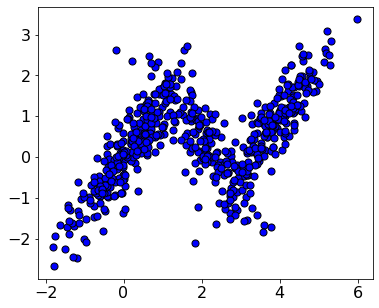

In [500]:
import scipy.stats
import scipy as sp


np.random.seed(0)

N1    = 250
N2    = 150
N3    = 200

vMu1  = np.array([0, 0])
vMu2  = np.array([2, 0.5])
vMu3  = np.array([4, 1])

mSig1 = .5 * np.array([[1.00, 1.25],
                       [1.25, 2.00]])

mSig2 = .5 * np.array([[ 1.00, -1.25],
                       [-1.25,  2.00]])

mSig3 = .5 * np.array([[1.00, 1.25],
                       [1.25, 2.00]])

mX1 = sp.stats.multivariate_normal.rvs(mean=vMu1, cov=mSig1, size=N1)
mX2 = sp.stats.multivariate_normal.rvs(mean=vMu2, cov=mSig2, size=N2)
mX3 = sp.stats.multivariate_normal.rvs(mean=vMu3, cov=mSig3, size=N3)
mX  = np.r_[mX1, mX2, mX3].T

plt.figure(figsize=(6,5))
plt.scatter(mX[0,:], mX[1,:], s=50, edgecolors='k', color='b')
plt.axis('equal')
plt.axis('tight')
plt.show()


### 2.2.4 Compare K-Means to GMM 
* Set $K=3$ and apply K-Means and GMM to the above dataset.
* Repeat several times.

halt after 7 iterations


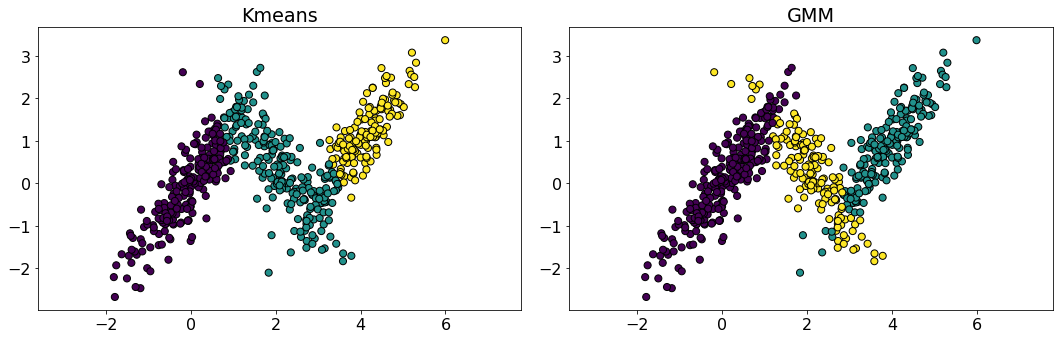

In [505]:
'''
Your code here...
'''

def plot_gmm(ax, data, K):
  vIdx = GMM(data.T, K)
  ax.scatter(data[:,0], data[:,1], s=50, edgecolors='k', c=vIdx)
  ax.axis('equal')


def plot_kmeans(ax, data, K):
    centeroids = KMeans(data, 3)[-1]
    mD   = cdist(centeroids,data)
    vIdx = np.argmin(mD, axis=0)  
    ax.scatter(data[:,0], data[:,1], s=50, edgecolors='k', c=vIdx)
    ax.axis('equal')
    
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

plot_gmm(axes[1], mX.T, 3)
axes[1].set_title("GMM")
plot_kmeans(axes[0], mX.T, 3)
axes[0].set_title("Kmeans")
plt.tight_layout()
plt.show()

------------------------------------------------------------------------------------------------------
## 2.4 DBSCAN
### 2.4.1
Implement the DBSCAN algorithm.
```python
def DBSCAN(mX, Z, r):
    '''
    Apply DBSCAN
    Args:
        mX   - Input data,                                   mX.shape = d, N
        Z    - Number of points required to be a core point, positive integer
        r    - Neighborhood radius,                          positive real.
    Output:
        vIdx - Index of the cluster each point belongs to,   vIdx.shape = N
    '''
    pass
```
**Notes**:
* Noise points should have index `-1`.
* Implement an auxiliary function to compute connected components (using BFS or DFS).

In [ ]:
'''
Your code here...
'''

### 2.4.2 Comparison
1. Consider the following datasets:

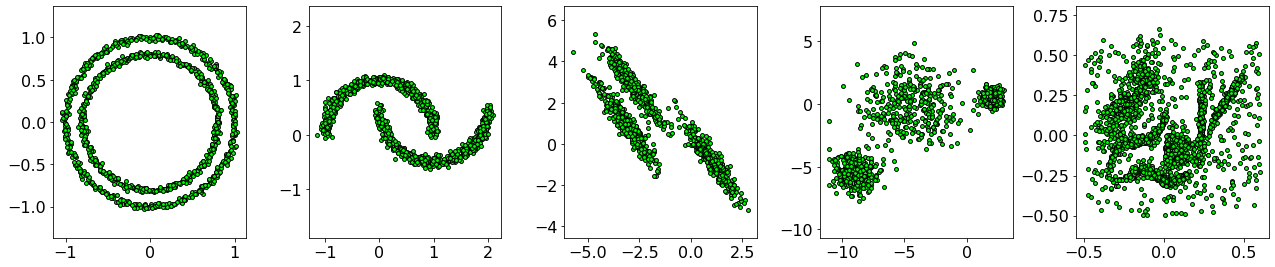

In [8]:
from sklearn import datasets

np.random.seed(0)

N   = 1000
A   = np.array([[0.6, -0.6],
                [-0.4, 0.8]]);
mX1 = datasets.make_circles(n_samples=N, noise=0.02)      [0]
mX2 = datasets.make_moons  (n_samples=N, noise=0.05)      [0]
mX3 = datasets.make_blobs  (n_samples=N, random_state=170)[0] @ A
mX4 = datasets.make_blobs  (n_samples=N, random_state=170, cluster_std=[.8, 2, .4])[0] 
mX5 = np.load('clusterable_data.npy')

lDatasets = [mX1, mX2, mX3, mX4, mX5]

fig, ax = plt.subplots(1, 5, figsize=(18, 4))
for ii, ax in enumerate(fig.axes):
    mXi = lDatasets[ii]
    ax.scatter(*mXi.T, c='lime', s=15, edgecolor='k')
    ax.axis('equal')
    
plt.tight_layout()
plt.show()

2. Apply and compare your clustering methods to these datasets.
    * **2% Bonus:**  
    Add to your comparison the hierarchical and HDBSCAN methods.  
    You may use existing libraries for these methods.
    
**Note:** The datasets are transposed.

In [ ]:
'''
Your code here...
'''